   # 📚 Machine Learning Project

## Fait par : 
* AGZOUL Imane
* BOUAGOUN Khadija
* OUKESSOU Houda

## 1️⃣ Prétraitement des données

### Importation des librairies

In [88]:
import pandas as pd

### Importation des données :
Apres avoir extrait les données relatives aux livres du web et les avoir sauvegardées dans un fichier csv appelé "books.csv", on va les télécharger maintenent dans une dataset qu'on va appeler 'books'

In [89]:
books=pd.read_csv('books.csv')

In [90]:
books.head()

,Title,Author,Genre,Pages,Year,Downloads,Rating
0,White Fang,\nJack London\n,Adventure,176.0,1906.0,"41,412",5.000000
1,20000 Lieues sous les mers,\nJules Verne\n,Adventure,449.0,1870.0,"31,688",4.000000
2,By Wit of Woman,\nArthur W. Marchmont\n,Adventure,268.0,1905.0,"32,146",0.000000
3,The Lost World,\nArthur Conan Doyle\n,Adventure,198.0,1912.0,"32,490",4.625000
4,The Call of the Wild,\nJack London\n,Adventure,86.0,1903.0,"86,550",4.083333


Tout d'abord, on constate que les valeurs de la colonne 'Author' commencent et se terminent par '\n' qu'on doit enlever.
Aussi, on remarque que pour les colonnes 'Pages' et 'Year' ne sont pas des entiers comme prevu.
Et finalement, la virgule dans les elements de la colonne 'Downloads' prouvent que leur type est object et non pas un entier.
En somme, les colonnes 'Pages', 'Year' et 'Downloads' doivent etre converties en entiers.

In [91]:
#La taille de notre dataset
books.shape

(2358, 7)

In [92]:
#Les informations relatives aux données
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      2358 non-null   object 
 1   Author     2242 non-null   object 
 2   Genre      2358 non-null   object 
 3   Pages      2024 non-null   float64
 4   Year       2137 non-null   float64
 5   Downloads  2358 non-null   object 
 6   Rating     2358 non-null   float64
dtypes: float64(3), object(4)
memory usage: 129.1+ KB


- Comme on a constaté auparavant, les colonnes 'Pages', 'Year','Downloads' et 'Rating' ne sont pas des entiers.
- En se basant sur les resultats ci-dessus, on remarque que de plus que les colonnes 'Author', 'Pages' et 'Year' contiennet des elements nulls 'NaN'
- Pour obtenir le nombre exact de valeurs manquantes, on execute la ligne de code suivante:

In [93]:
#Nombre de valeurs manquentes par colonnes
books.isna().sum()

Title          0
Author       116
Genre          0
Pages        334
Year         221
Downloads      0
Rating         0
dtype: int64

- Pour remedier a ce probleme, on va supprimer les lignes dont la valeur de 'Author' est manquante
- Quant aux deux colonnes 'Pages' et 'Year', on va les remplacer par la moyenne

### Prétraitement des données

- Dans cette étape, on va se débarasser des deux '\n' de la colonne 'Author':

In [94]:
books['Author']=books['Author'].str.strip('\n')

In [95]:
books.Author.head()

0            Jack London
1            Jules Verne
2    Arthur W. Marchmont
3     Arthur Conan Doyle
4            Jack London
Name: Author, dtype: object

- Maintenent, on va se débarasser de la virgule de la colonne 'Downloads'

In [96]:
books['Downloads']=books['Downloads'].str.replace(',','')

In [97]:
books.Downloads.head()

0    41412
1    31688
2    32146
3    32490
4    86550
Name: Downloads, dtype: object

- Traitement des valeurs manquantes :

In [98]:
#Supprimer les lignes qui n'ont pas un auteur
books.dropna(subset=['Author'],inplace=True)

In [99]:
#S'assurer que les valeurs manquantes sont bien supprimées
books.Author.isna().sum()

0

In [100]:
#Remplacer les valeurs manquentes de la colonne 'Year'
books['Year']=books.Year.fillna(books.Year.mean())

In [101]:
#S'assurer que les valeurs manquantes sont bien remplacées
books.Year.isna().sum()

0

In [102]:
#Remplacer les valeurs manquentes de la colonne 'pages'
books['Pages']=books.Pages.fillna(books.Pages.mean())

In [103]:
#S'assurer que les valeurs manquantes sont bien remplacées
books.Pages.isna().sum()

0

In [104]:
books.isna().sum()

Title        0
Author       0
Genre        0
Pages        0
Year         0
Downloads    0
Rating       0
dtype: int64

Il n y a plus de valeurs manquentes dans notre dataset

- Conversion des types

In [105]:
#Convertir 'Pages' en entier
books['Pages']=books.Pages.astype('int64')
#S'assurer du bon déroulement de la conversion
books.Pages.dtype

dtype('int64')

In [106]:
#Convertir 'Year' en entier
books['Year']=books.Year.astype('int64')
#S'assurer du bon déroulement de la conversion
books.Year.dtype

dtype('int64')

In [107]:
#Convertir 'Downloads' en entier
books['Downloads']=books.Downloads.astype('int64')
#S'assurer du bon déroulement de la conversion
books.Downloads.dtype

dtype('int64')

In [108]:
#Convertir 'Downloads' en entier
books['Rating']=books.Rating.astype('int64')
#S'assurer du bon déroulement de la conversion
books.Rating.dtype

dtype('int64')

In [109]:
books.describe()

,Pages,Year,Downloads,Rating
count,2242.000000,2242.000000,2242.000000,2242.000000
mean,227.258252,1904.534790,24713.464318,2.150312
std,210.002020,150.412106,53713.629072,2.031034
min,0.000000,0.000000,259.000000,0.000000
25%,97.000000,1893.000000,2170.500000,0.000000
50%,208.000000,1908.000000,8978.000000,3.000000
75%,274.000000,1931.000000,25084.000000,4.000000
max,2049.000000,2022.000000,782825.000000,5.000000


On constate l'existance de certains livres dont le nombre de pages vaut 0 et l'annee de publication vaut 0

In [110]:
#nombre de livres ayant Year = 0
books[books['Year']==0].shape[0]

3

In [111]:
books[books['Year']==0]

,Title,Author,Genre,Pages,Year,Downloads,Rating
1004,The Art of War,Zi Sun,History,150,0,782825,4
1540,The Art of War,Zi Sun,Philosophy,150,0,782825,4
2243,The Art of War,Zi Sun,War,150,0,782825,4


En cherchant sur le web le livre 'The Art of War' on trouve qu'il a ete ecrit 5 av J.C donc on va pas changer la valeur 0

In [112]:
#nombre de livres ayant Pages = 0
books[books['Pages']==0].shape[0]

82

In [113]:
#Remplacer le nombre de page =0 par la moyenne
books.Pages=books.Pages.replace(0,int(books.Year.mean()))

In [114]:
books[books['Pages']==0]

,Title,Author,Genre,Pages,Year,Downloads,Rating


# 2️⃣ Analyse exploratoire des données

## Distribution des types de variables 

In [115]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [116]:
books.dtypes.value_counts()

int64     4
object    3
dtype: int64

<AxesSubplot:ylabel='None'>

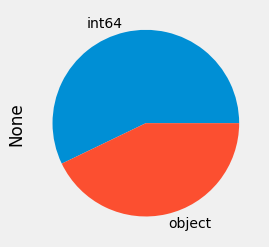

In [117]:
books.dtypes.value_counts().plot.pie()

On remarque la presence de trois variables qualitaties et quatre quantitatives.

## Analyse des variables quantitatives 

In [118]:
print(f"Les variables quantitatives sont : {books.select_dtypes(['int']).columns}")

Les variables quantitatives sont : Index([], dtype='object')


In [119]:
for col in books.select_dtypes(['int']):
    plt.figure()
    sns.distplot(books[col])

Toutes les variables quantitatives n'ont pas une distribution normale, du coup, on doit la normaliser apres dans l'etape de modelisation.

### Anayse de la variable Rating :

In [120]:
# helper function
def plot_countplot(df, column_name, figsize=(6, 4), orient='v'):
    with sns.axes_style('ticks'):
        _, ax = plt.subplots(figsize=figsize)
        
        if orient == 'v':
            sns.countplot(x=column_name, data=df, color='#ff6198', alpha=.7, ax=ax)
        else:
            sns.countplot(y=column_name, data=df, color='#ff6198', alpha=.7, ax=ax)
            
        sns.despine(offset=(0, 4))

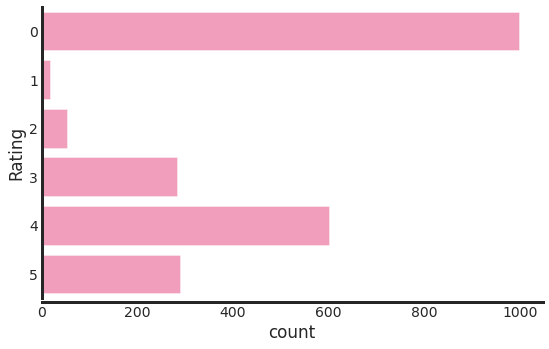

In [121]:
plot_countplot(books, 'Rating', figsize=(8, 5), orient='h')

La majorite des livres présents dans notre jeu de données ont soit de mauvaises évaluations ou des évaluations qui sont élevés!

### Analyse de la correlation entre les vatiables quantitatives

<Figure size 432x288 with 0 Axes>

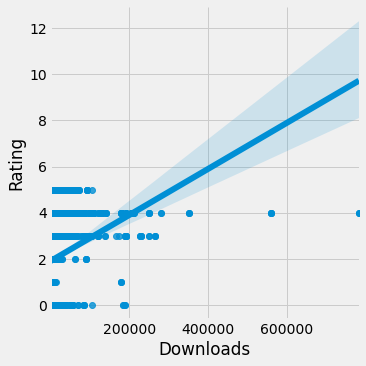

<Figure size 432x288 with 0 Axes>

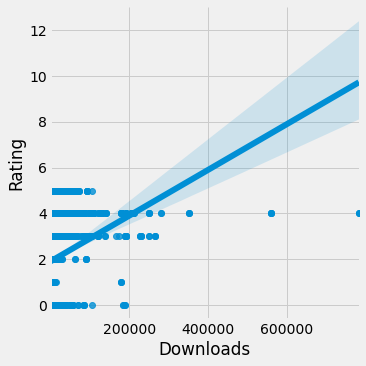

<Figure size 432x288 with 0 Axes>

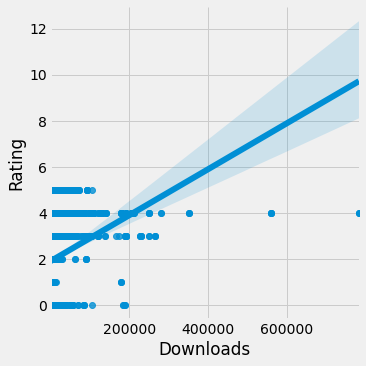

In [122]:
for col in ['Pages', 'Year', 'Downloads'] :
    plt.figure()
    sns.lmplot(x='Downloads', y='Rating', data=books)

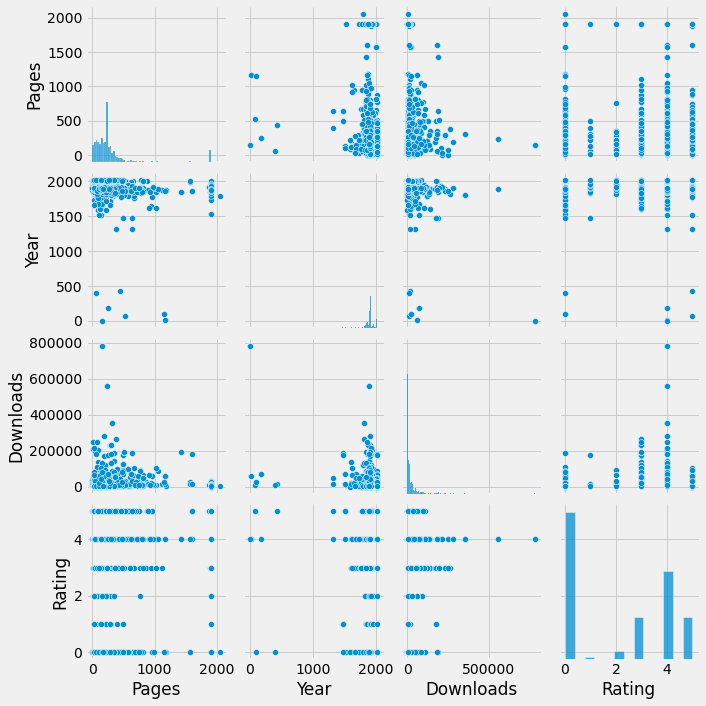

In [123]:
sns.pairplot(books)
plt.show()

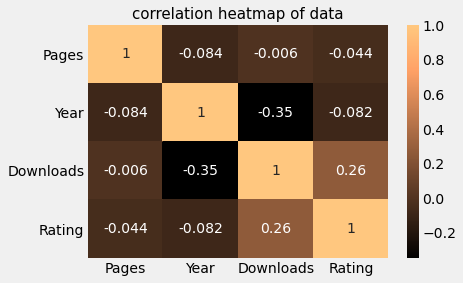

In [124]:
sns.heatmap(books.corr(), annot = True , cmap = 'copper')  #annot = true means it will show the values in heatmap 
plt.title('correlation heatmap of data', fontsize = 15)
plt.show()

A partir de ces trois resultats, on remarque qu'il n'y a pas de fortes correlations lineares entre nos variables sauf entre Downloads et Year!

### Analyse de la correlation entre Downloads et Rounded Rating

<AxesSubplot:xlabel='Rating', ylabel='Downloads'>

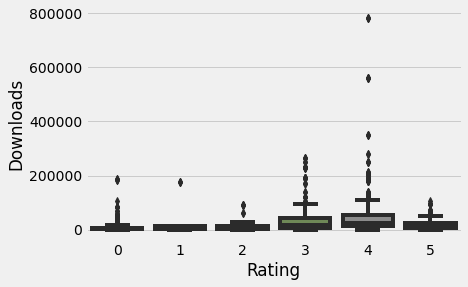

In [125]:
sns.boxplot(x='Rating', y='Downloads', data=books)

Y'a pas de grande variation entre les differents evaluations.

## Analyse des variables quanlitatives

In [126]:
print(f"Les variables qualitatives sont : {books.select_dtypes('O').columns}")

Les variables qualitatives sont : Index(['Title', 'Author', 'Genre'], dtype='object')


### Analyse de la variable Genre 

In [127]:
col = 'Genre'
print(f'Nombre de genres presents dans le jeu de donnees est : {books[col].nunique()}','\n')
print(f"{col :-<50} {books[col].unique()}")

Nombre de genres presents dans le jeu de donnees est : 61 

Genre--------------------------------------------- ['Adventure' 'African-American Studies' 'Art' 'Banned Books' 'Biography'
 'Business' 'Canadian Literature' 'Classic' 'Computers' 'Cooking'
 'Correspondence' 'Creative Commons' 'Criticism' 'Drama' 'Espionage'
 'Essays' 'Etiquette' 'Fantasy' 'Fiction and Literature' 'Games'
 'Gay/Lesbian' 'Ghost Stories' 'Gothic' 'Harvard Classics' 'Health'
 'History' 'Horror' 'Humor' 'Instructional' 'Language' 'Music'
 'Mystery/Detective' 'Myth' 'Nature' 'Nautical' 'Non-fiction' 'Occult'
 'Periodical' 'Philosophy' 'Pirate Tales' 'Poetry' 'Politics' 'Post-1930'
 'Psychology' 'Pulp' 'Random Selection' 'Reference' 'Religion' 'Romance'
 'Satire' 'Science' 'Science Fiction' 'Sexuality' 'Short Story'
 'Short Story Collection' 'Thriller' 'Travel' 'War' 'Western'
 "Women's Studies" 'Young Readers']


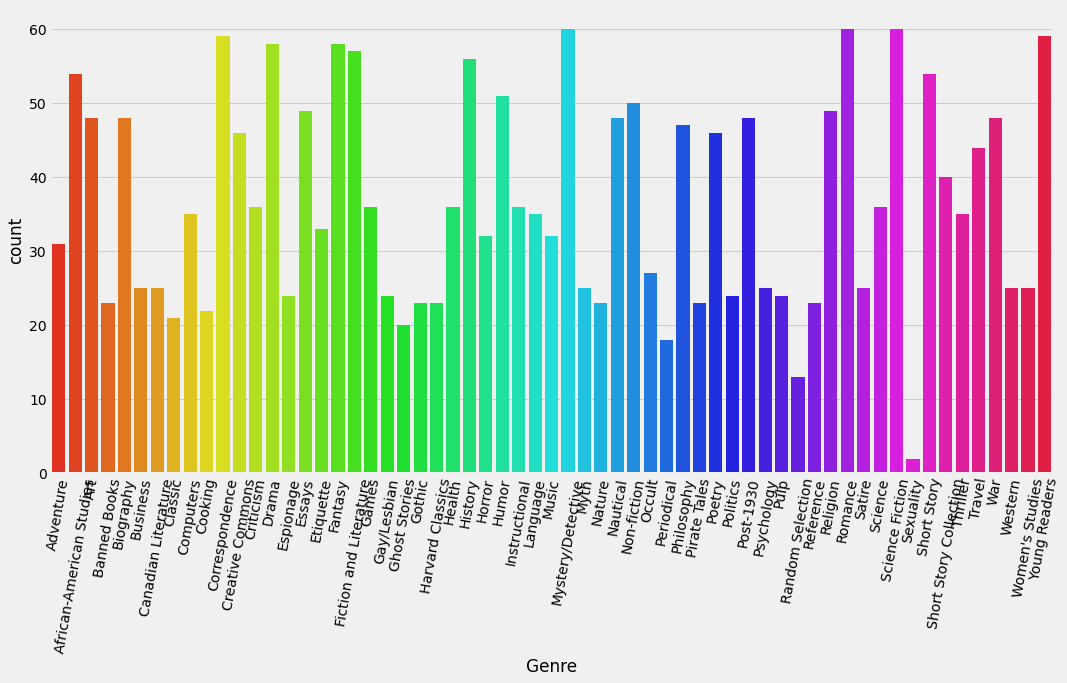

In [128]:
# on visualise le nombre de livres par genre
plt.figure(figsize=(16,8))
chart = sns.countplot(
    data=books,
    x='Genre',
    palette='hsv'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
plt.show()

On a 61 genre de livres.

In [129]:
print(f'Le nombre des differents livres dans notre jeu de donnees est  : {books.Title.nunique()}' )
print(f'Le nombre des differents auteurs dans notre jeu de donnees est : {books.Author.nunique()}' )

Le nombre des differents livres dans notre jeu de donnees est  : 1544
Le nombre des differents auteurs dans notre jeu de donnees est : 1146


Notre jeu de donnees est tres diversifiee en terme de livres et auteurs.

# 3️⃣ Model Building

## Préparation des données

### Déclaration des Features

In [130]:
X = books.drop(columns = ['Title'])
X

,Author,Genre,Pages,Year,Downloads,Rating
0,Jack London,Adventure,176,1906,41412,5
1,Jules Verne,Adventure,449,1870,31688,4
2,Arthur W. Marchmont,Adventure,268,1905,32146,0
3,Arthur Conan Doyle,Adventure,198,1912,32490,4
4,Jack London,Adventure,86,1903,86550,4
...,...,...,...,...,...,...
2352,W. H. G. Kingston,Young Readers,1904,1874,1049,0
2353,J. M. Barrie,Young Readers,137,1904,40361,4
2354,Angela Brazil,Young Readers,164,1912,83206,0
2355,Charles Dickens,Young Readers,358,1839,55864,3


### Conversion des variables catégoricales en variables numériques

In [131]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Genre'] = le.fit_transform(X['Genre'])
X['Author'] = le.fit_transform(X['Author'])

In [132]:
#Vérification que toutes nos données sont désormais numériques
X.dtypes

Author       int32
Genre        int32
Pages        int64
Year         int64
Downloads    int64
Rating       int64
dtype: object

In [133]:
#Visualisation des valeurs de la colonne Genre
X['Genre'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

### Feature Scaling

In [134]:
cols = X.columns

In [135]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X = mms.fit_transform(X)

In [136]:
X = pd.DataFrame(X, columns=cols)

In [137]:
X.head()

,Author,Genre,Pages,Year,Downloads,Rating
0,0.459389,0.0,0.085449,0.942631,0.052587,1.0
1,0.559825,0.0,0.218750,0.924827,0.040161,0.8
2,0.073362,0.0,0.130371,0.942136,0.040747,0.0
3,0.066376,0.0,0.096191,0.945598,0.041186,0.8
4,0.459389,0.0,0.041504,0.941147,0.110267,0.8


## Préparation d'un modèle de Machine Learning

### Modèle K-Means avec deux clusters

In [138]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

### Affichage des paramètres du modèle KMeans

In [139]:
# Affichage des centroids du cluster
kmeans.cluster_centers_

array([[0.51866854, 0.46867761, 0.1547993 , 0.94805117, 0.00944259,
        0.01119691],
       [0.49148073, 0.52330017, 0.13561627, 0.93662786, 0.04998168,
        0.78988391]])

In [140]:
# Plus l'inertie du modèle est faible, meilleur est le modèle.
kmeans.inertia_

517.7269777319732

Nous constatons que ce modèle possède une valeur d'inertie très élévée, il s'agit donc d'un mauvais modèle pour ajuster les données. Nous devons donc changer le nombre de clusters.

### Utilisation de la méthode du coude (The Elbow Method) pour une valeur optimale de k en KMeans

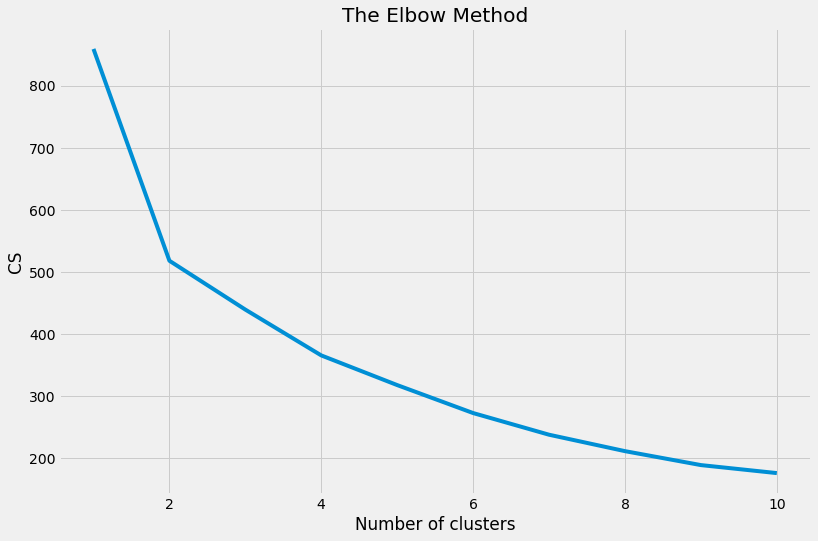

In [141]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

plt.figure(figsize = (12,8))
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

* Pour déterminer le nombre optimal de clusters, On sélectionne la valeur de k au «coude» qui correspond au point après lequel l'inertie commence à diminuer de façon linéaire. 
* Dans notre cas, on conclue que le nombre optimal de clusters pour les données est égal à soit 2, soit 3, soit 4 .
* Or, nous avons constaté précédemment que pour k=2, notre modèle n'est pas optimal. Par conséquent, nous retenons les valeurs 3 et 4 pour k.

### Modèle K-Means avec trois clusters

In [142]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

print(kmeans.inertia_)

439.0612165251724


Nous obtenons une valeur d'inertie bien plus faible que celle obtenue avec k = 2. Nous pouvons donc potentiellement retenir la valeur de 3 pour le nombre de clusters. Cependant, vérifions d'abord s'il n'y a pas mieux avec k = 4.

### Modèle K-Means avec quatre clusters

In [143]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

print(kmeans.inertia_)

365.2642920531957


Avec un nombre de clusters égal à 4 nous obtenons une inertie bien plus faible que celle obtenue avec k = 2 et k = 3. Nous retenons donc k = 4 comme nombre de clusters optimal.

### Ajustement du modèle et prédictions 

In [144]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [145]:
#Affectation des labels à chaque ligne

labels = kmeans.labels_
X['Cluster'] = labels
X.head()

,Author,Genre,Pages,Year,Downloads,Rating,Cluster
0,0.459389,0.0,0.085449,0.942631,0.052587,1.0,2
1,0.559825,0.0,0.218750,0.924827,0.040161,0.8,0
2,0.073362,0.0,0.130371,0.942136,0.040747,0.0,3
3,0.066376,0.0,0.096191,0.945598,0.041186,0.8,2
4,0.459389,0.0,0.041504,0.941147,0.110267,0.8,2


In [146]:
clusters=pd.DataFrame(X['Cluster'])
clusters.head()

,Cluster
0,2
1,0
2,3
3,2
4,2


In [147]:
books_final = pd.concat([books, clusters],axis=1)
books_final.head()

,Title,Author,Genre,Pages,Year,Downloads,Rating,Cluster
0,White Fang,Jack London,Adventure,176.0,1906.0,41412.0,5.0,2.0
1,20000 Lieues sous les mers,Jules Verne,Adventure,449.0,1870.0,31688.0,4.0,0.0
2,By Wit of Woman,Arthur W. Marchmont,Adventure,268.0,1905.0,32146.0,0.0,3.0
3,The Lost World,Arthur Conan Doyle,Adventure,198.0,1912.0,32490.0,4.0,2.0
4,The Call of the Wild,Jack London,Adventure,86.0,1903.0,86550.0,4.0,2.0


In [148]:
# Convertir en int
books_final['Cluster'] = pd.to_numeric(books_final['Cluster'], errors='coerce').fillna(0).astype(int)
books_final['Pages'] = pd.to_numeric(books_final['Pages'], errors='coerce').fillna(0).astype(int)
books_final['Year'] = pd.to_numeric(books_final['Year'], errors='coerce').fillna(0).astype(int)
books_final['Rating'] = pd.to_numeric(books_final['Rating'], errors='coerce').fillna(0).astype(int)

In [149]:
books_final.head()

,Title,Author,Genre,Pages,Year,Downloads,Rating,Cluster
0,White Fang,Jack London,Adventure,176,1906,41412.0,5,2
1,20000 Lieues sous les mers,Jules Verne,Adventure,449,1870,31688.0,4,0
2,By Wit of Woman,Arthur W. Marchmont,Adventure,268,1905,32146.0,0,3
3,The Lost World,Arthur Conan Doyle,Adventure,198,1912,32490.0,4,2
4,The Call of the Wild,Jack London,Adventure,86,1903,86550.0,4,2


### Partie d'apprentissage supervisée

On va créer un modèle qui va apprendre a prédire le cluster en fonction du Title , Author, Genre , Pages, Year, Rating 

In [150]:
X_train=books_final.drop(columns = ['Downloads','Cluster','Rating'])
y_train=books_final['Cluster']

In [151]:
X_train['Title'] = le.fit_transform(X_train['Title'])
X_train['Author'] = le.fit_transform(X_train['Author'])
X_train['Genre'] = le.fit_transform(X_train['Genre'])

In [152]:
cols = X_train.columns
X_train = mms.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=cols)

In [153]:
# Importer KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [154]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [155]:
knn.score(X_train,y_train)

0.9652100127280441

### Classification des livres appreciés par un user selon les classes apprises

In [156]:
user=pd.read_csv('user_books.csv')

In [157]:
user

,Title,Author,Genre,Pages,Year
0,Morning Glory,Lavyrle Spencer,Romance,448,1993
1,The Hunger Games Trilogy,Suzanne Collins,Science Fiction,1187,2010
2,Bird Box,Josh Malerman,Horror,305,2014
3,Emma,Jane Austen,Romance,1036,1815
4,The Testaments,Margaret Atwood,Science Fiction,432,2019
5,"Olive, Again",Elizabeth Strout,Fiction and Literature,305,2019
6,Indigo,Beverly Jenkens,Romance,398,1996
7,The Water Dancer,Ta-Nehisi Coates,Fantasy,407,2019
8,And Then There Were None,Agatha Christie,Mystery/Detective,272,1939
9,Beloved,Toni Morrison,Classic,321,1987


In [158]:
user['Title'] = le.fit_transform(user['Title'])
user['Author'] = le.fit_transform(user['Author'])
user['Genre'] = le.fit_transform(user['Genre'])

In [159]:
cols = user.columns
user = mms.fit_transform(user)
user = pd.DataFrame(user, columns=cols)

In [160]:
y_pred=knn.predict(user)

In [161]:
pd.DataFrame(y_pred).value_counts()

0    6
2    2
1    1
3    1
dtype: int64

On en deduit alors que la majorité des livres que l'utilisateur aime appartiennent au Cluster '0'

Par consequent, on va lui recommender 3 premiers livres avec un rating élevé

In [162]:
books_final[books_final.Cluster==0].sort_values(by='Rating',ascending=False).head(3)

,Title,Author,Genre,Pages,Year,Downloads,Rating,Cluster
2317,Secrets and Guardians: Devious Intentions,H. Chambers,Young Readers,214,2016,4126.0,5,0
2251,Riders of the Purple Sage,Zane Grey,Western,255,1912,8503.0,5,0
2028,Shimmer,Claudette Melanson,Short Story,10,2014,1691.0,5,0
